Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
Рассчитать и визуализировать корреляционную матрицу для переменных
Визуализировать несколько взаимосвязей между переменными
С использованием t-test статистики проверить взаимосвязи между несколькими переменными
Рассчитать сколько работников работает в каждом департаменте
Показать распределение сотрудников по зарплатам
Показать распределение сотрудников по зарплатам совместно с департаментами
Сколько сотрудников покинули компанию
Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *
import researchpy as rp
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
statistics.mean(df['satisfaction_level'])

0.6128335222348157

In [6]:
statistics.median(df['average_montly_hours'])

200

In [7]:
statistics.mode(df['time_spend_company'])

3

In [8]:
min(df['last_evaluation'])

0.36

In [9]:
max(df['last_evaluation'])

1.0

In [10]:
statistics.pstdev(df['promotion_last_5years'])

0.14427665479561314

In [6]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитать и визуализировать корреляционную матрицу для переменных

In [7]:
corr_matrix = df.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


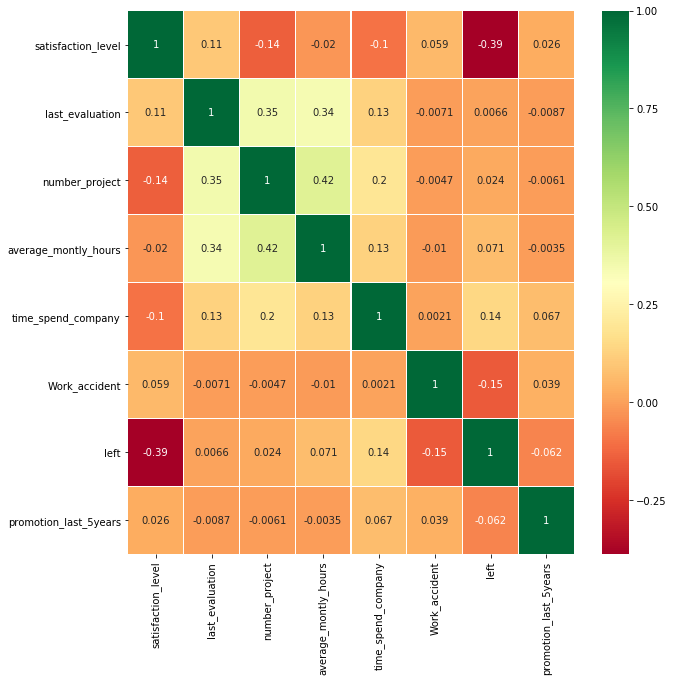

In [8]:
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.3) 
fig=plt.gcf()
fig.set_size_inches(10,10)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.show()

In [ ]:
# Номализуем данные и еще раз построим корреляционную матрицу

In [19]:
df_matr = df.iloc[:,:8]

In [20]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df_matr)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0


In [21]:
headers_matr = headers[:8]
df_norm.columns = headers_matr
df_norm.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0


(8.0, 0.0)

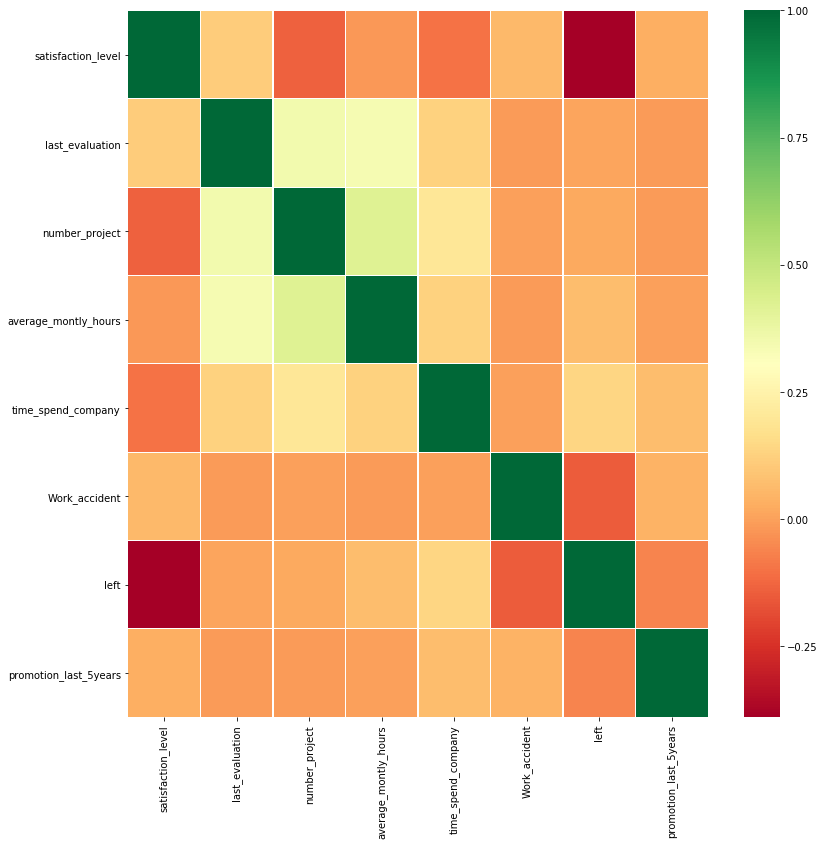

In [22]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df_norm.corr(), decimals=2)
ax = sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [ ]:
# Результаты схожи

Визуализировать несколько взаимосвязей между переменными

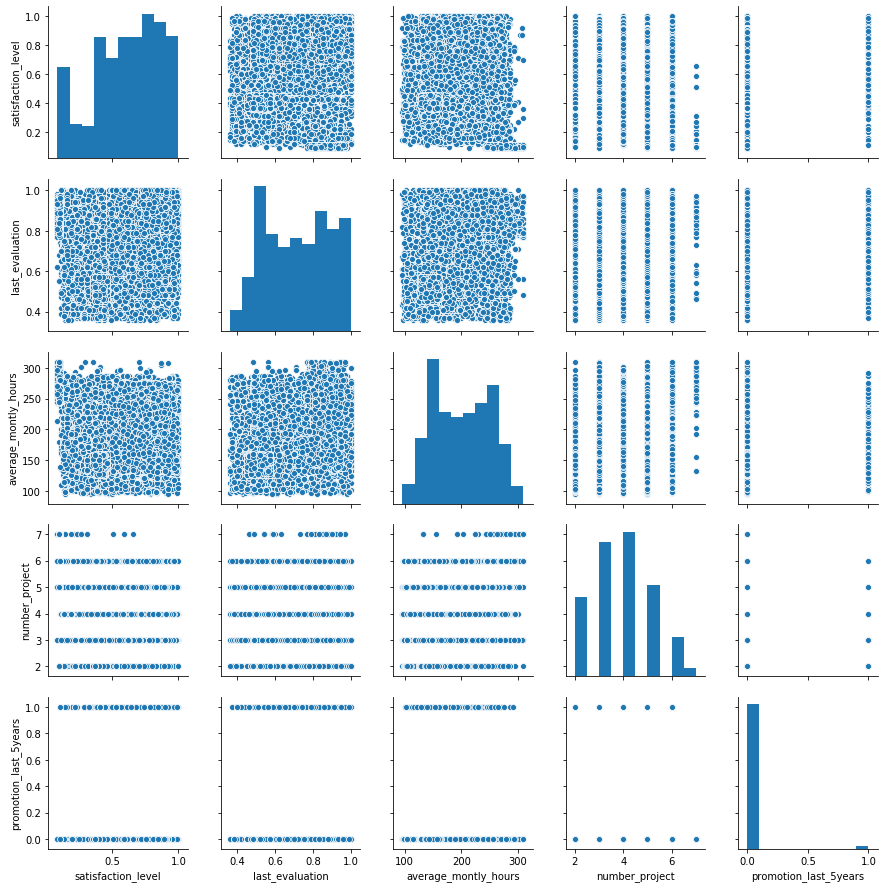

In [11]:
sns_plot = sns.pairplot(
    df[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'number_project', 'promotion_last_5years']])
sns_plot

In [ ]:
# Не ярко проявились корреляции и взаимосвязи. У тех, кто перерабатывает за 300 часов в месяц, 
# выше оценки, но ниже уровень удовлетворенности. Участники 7 проектов, больше работают, выше средние оценки, 
# но ниже уровень удовлетворенности. Наименее информативный параметр - продвижение за последние 5 лет.

# Рассмотрим некоторые взаимосвязи между параметрами поподробнее:

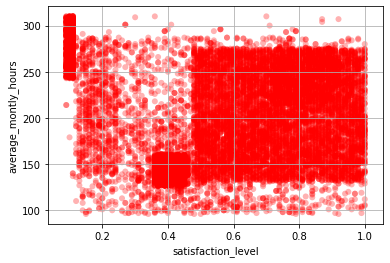

In [24]:
satisfaction_level = df['satisfaction_level']
average_montly_hours = df['average_montly_hours']
fig, ax = plt.subplots()
ax.scatter(satisfaction_level, average_montly_hours, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.show()
# При низкой занятости уровень удовлетворенности более-менее равномерно распределен, 
# при средней занятости - больше высоких значений удовлетворенности, 
# при высокой занятости выделяется подгруппа с очень низким уровнем удовлетворенности

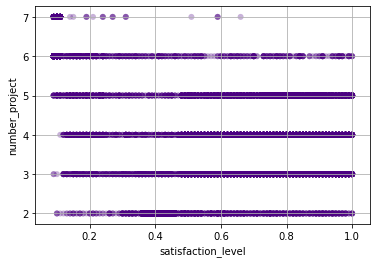

In [25]:
satisfaction_level = df['satisfaction_level']
number_project = df['number_project']
fig, ax = plt.subplots()
ax.scatter(satisfaction_level, number_project, c='indigo', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('satisfaction_level')
plt.ylabel('number_project')
plt.show()
# Не совсем ясно 'number_project' это номер проекта или количество проектов
# В любом случае сотрудники, относящиеся к 7 проекту/принимавшие участие в 7 проектах 
# показывают очень низкий уровень удовлетворенности

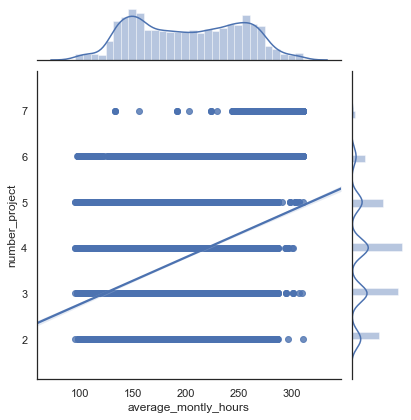

In [27]:
average_montly_hours = df['average_montly_hours']
number_project = df['number_project']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=average_montly_hours, y=number_project, data=df, kind='reg')
plt.show()
# Участники семи проектов работали значительно больше остальных

С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [15]:
# Проверим совпадение распределения уровня удовлетворенности в группах с высокой и низкой зарплатой 
sat_high = df[df['salary'] == 'high']['satisfaction_level']
sat_low = df[df['salary'] == 'low']['satisfaction_level']

In [16]:
sts.shapiro(sat_high)

(0.9594685435295105, 4.769292214999549e-18)

In [17]:
sts.shapiro(sat_low)

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9503720998764038, 3.0828566215145976e-44)

In [ ]:
# Тест Шапиро показывает, что данные не соответствуют нормальному распределению, поэтому применим критерий Манна - Уитни.
# К сожалению, не смогла подобрать выборки с нормальным распределением, 
# поэтому приведу t-test статистику только как пример возможного применения

In [18]:
len(sat_high), len(sat_low)

(1237, 7316)

In [19]:
statistics.variance(sat_high), statistics.variance(sat_low)

(0.05143428811745715, 0.06481798361964357)

In [20]:
print(stats.mannwhitneyu(sat_high, sat_low))

MannwhitneyuResult(statistic=4187327.0, pvalue=1.3117365702204594e-05)


In [ ]:
# print(stats.ttest_ind(sat_high, sat_low, equal_var=False))

In [ ]:
# p-value меньше 0.01, значит группы статистически отличаются

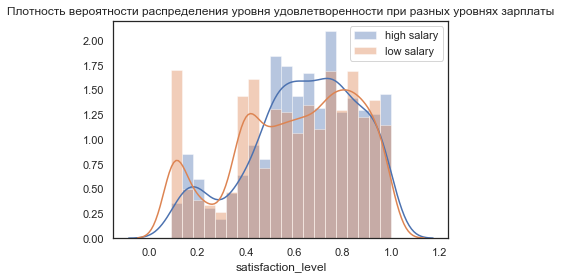

In [29]:
sns.distplot(sat_high, 20)
sns.distplot(sat_low, 20)
plt.title('Плотность вероятности распределения уровня удовлетворенности при разных уровнях зарплаты')
plt.legend(['high salary', 'low salary'])
plt.show()

In [21]:
# Проверим совпадение распределений оценок у сотрудников, имевших несчастные случаи на работе, и всех остальных
eval_injured_person = df[df['Work_accident'] == 1]['last_evaluation']
eval_other = df[df['Work_accident'] == 0]['last_evaluation']

In [23]:
sts.shapiro(eval_injured_person)

(0.9656562805175781, 2.5618582276656585e-22)

In [24]:
sts.shapiro(eval_other)

(0.9495567083358765, 0.0)

In [25]:
len(eval_injured_person), len(eval_other)

(2169, 12830)

In [26]:
statistics.variance(eval_injured_person), statistics.variance(eval_other)

(0.027810496232555687, 0.029550941987861557)

In [27]:
print(stats.mannwhitneyu(eval_injured_person, eval_other))

MannwhitneyuResult(statistic=13782440.0, pvalue=0.24002587921967583)


In [ ]:
#  print(stats.ttest_ind(eval_injured_person, eval_other, equal_var=False))

In [ ]:
# pvalue=0.24, что намного больше стандартной ошибки 0.05, поэтому мы принимаем нулевую гипотезу и считаем, 
# что нет статистического различия между оценками пострадавших и непострадавших сотрудников

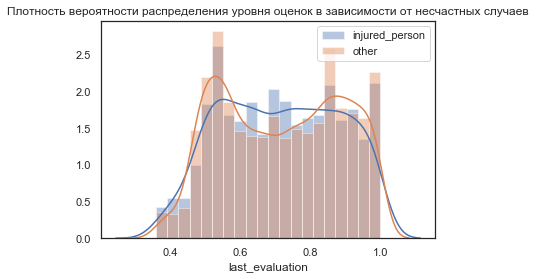

In [31]:
sns.distplot(eval_injured_person, 20)
sns.distplot(eval_other, 20)
plt.title('Плотность вероятности распределения уровня оценок в зависимости от несчастных случаев')
plt.legend(['injured_person', 'other'])
plt.show()

In [22]:
# Проверим совпадение распределения уровня удовлетворенности в зависимости от уровня занятости
sat_work_a_lot = df[df['average_montly_hours'] >= 200]['satisfaction_level']
sat_work_a_little = df[df['average_montly_hours'] <200]['satisfaction_level']

In [28]:
sts.shapiro(sat_work_a_lot)

(0.8891273736953735, 0.0)

In [29]:
sts.shapiro(sat_work_a_little)

(0.9699665307998657, 7.953814028227503e-37)

In [30]:
len(sat_work_a_lot), len(sat_work_a_little)

(7533, 7466)

In [31]:
statistics.variance(sat_work_a_lot), statistics.variance(sat_work_a_little)

(0.07488120757602644, 0.048463444943265016)

In [32]:
print(stats.mannwhitneyu(sat_work_a_lot, sat_work_a_little))

MannwhitneyuResult(statistic=25208680.0, pvalue=2.287371373149193e-28)


In [ ]:
# print(stats.ttest_ind(sat_work_a_lot, sat_work_a_little, equal_var=False))

In [ ]:
# p-value меньше 0.01, значит группы статистически отличаются

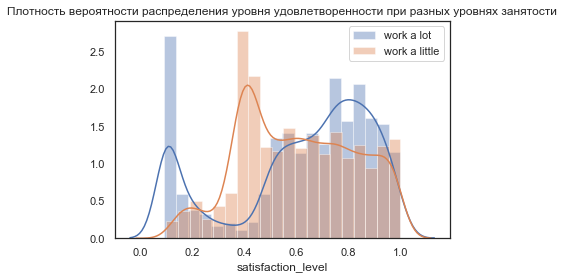

In [35]:
sns.distplot(sat_work_a_lot, 20)
sns.distplot(sat_work_a_little, 20)
plt.title('Плотность вероятности распределения уровня удовлетворенности при разных уровнях занятости')
plt.legend(['work a lot', 'work a little'])
plt.show()

In [33]:
# Проверим совпадение распределений оценок у сотрудников с различным уровнем занятости
eval_work_a_lot = df[df['average_montly_hours'] >= 200]['last_evaluation']
eval_work_a_little = df[df['average_montly_hours'] <200]['last_evaluation']

In [34]:
sts.shapiro(eval_work_a_lot)

(0.9494060277938843, 5.605193857299268e-45)

In [35]:
sts.shapiro(eval_work_a_little)

(0.9435046911239624, 0.0)

In [36]:
len(eval_work_a_lot), len(eval_work_a_little)

(7533, 7466)

In [37]:
print(stats.mannwhitneyu(eval_work_a_lot, eval_work_a_little))

MannwhitneyuResult(statistic=18571467.5, pvalue=1.9666693451066346e-284)


In [ ]:
# print(stats.ttest_ind(eval_work_a_lot, eval_work_a_little, equal_var=False))

In [ ]:
# p-value меньше 0.01, значит группы статистически отличаются

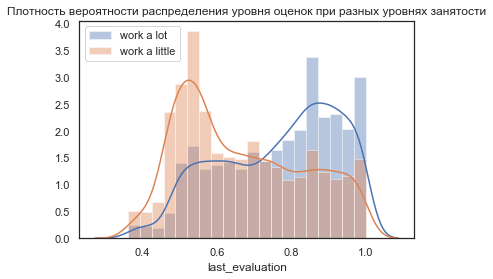

In [37]:
sns.distplot(eval_work_a_lot, 20)
sns.distplot(eval_work_a_little, 20)
plt.title('Плотность вероятности распределения уровня оценок при разных уровнях занятости')
plt.legend(['work a lot', 'work a little'])
plt.show()

Рассчитать сколько работников работает в каждом департаменте

In [57]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Показать распределение сотрудников по зарплатам

In [44]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [45]:
df['salary'].value_counts(normalize=True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

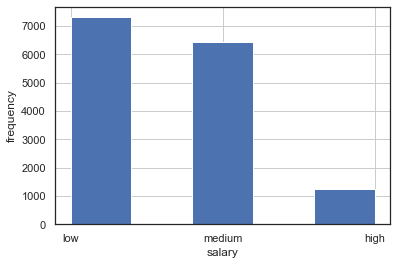

In [40]:
n, bins, patches = plt.hist(df['salary'], 5)
plt.ylabel('frequency')
plt.xlabel('salary')
plt.grid(True)
plt.show()

Показать распределение сотрудников по зарплатам совместно с департаментами

In [ ]:
# Не смогла сгруппировать данные в одном графике

In [40]:
df_sales = df[df['sales'] == 'sales']
df_sales['salary'].value_counts(normalize=True)

low       0.507005
medium    0.428019
high      0.064976
Name: salary, dtype: float64

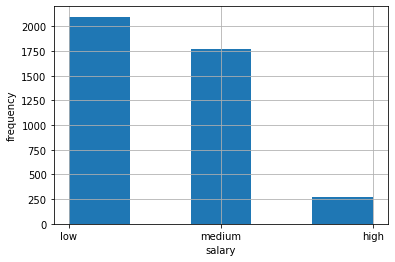

In [41]:
n, bins, patches = plt.hist(df_sales['salary'], 5)
plt.ylabel('frequency')
plt.xlabel('salary')
plt.grid(True)
plt.show()

In [42]:
df_accounting = df[df['sales'] == 'accounting']
df_accounting['salary'].value_counts(normalize=True)

low       0.466754
medium    0.436767
high      0.096480
Name: salary, dtype: float64

In [43]:
df_hr = df[df['sales'] == 'hr']
df_hr['salary'].value_counts(normalize=True)

medium    0.485792
low       0.453315
high      0.060893
Name: salary, dtype: float64

In [46]:
df_technical = df[df['sales'] == 'technical']
df_technical['salary'].value_counts(normalize=True)

low       0.504412
medium    0.421691
high      0.073897
Name: salary, dtype: float64

In [47]:
df_IT = df[df['sales'] == 'IT']
df_IT['salary'].value_counts(normalize=True)

low       0.496333
medium    0.436023
high      0.067645
Name: salary, dtype: float64

In [48]:
df_support = df[df['sales'] == 'support']
df_support['salary'].value_counts(normalize=True)

low       0.514132
medium    0.422611
high      0.063257
Name: salary, dtype: float64

In [49]:
df_management = df[df['sales'] == 'management']
df_management['salary'].value_counts(normalize=True)
# И так далее

high      0.357143
medium    0.357143
low       0.285714
Name: salary, dtype: float64

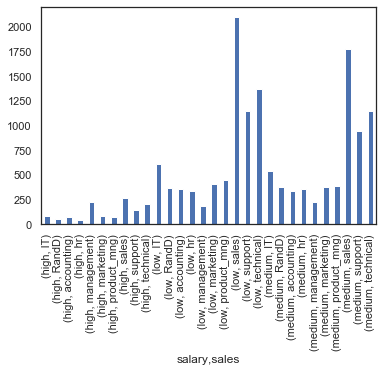

In [50]:
# Лучший вариант, но меня не устраивает
abc = df.groupby(['salary', 'sales']).count()
abc['satisfaction_level'].plot(kind = 'bar')

In [ ]:
Сколько сотрудников покинули компанию

In [51]:
len(df[df['left'] == 1])

3571

In [ ]:
Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [4]:
df_left = df[df['left'] == 1]
df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       3571 non-null float64
last_evaluation          3571 non-null float64
number_project           3571 non-null int64
average_montly_hours     3571 non-null int64
time_spend_company       3571 non-null int64
Work_accident            3571 non-null int64
left                     3571 non-null int64
promotion_last_5years    3571 non-null int64
sales                    3571 non-null object
salary                   3571 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 306.9+ KB


In [47]:
rp.summary_cont(df.groupby('left')['satisfaction_level', 'last_evaluation', 'promotion_last_5years'])

satisfaction_level                                                    \
                      N      Mean        SD        SE 95% Conf.  Interval   
left                                                                        
0                 11428  0.666810  0.217104  0.002031  0.662829  0.670790   
1                  3571  0.440098  0.263933  0.004417  0.431441  0.448755   

     last_evaluation                                                    \
                   N      Mean        SD        SE 95% Conf.  Interval   
left                                                                     
0              11428  0.715473  0.162005  0.001515  0.712503  0.718444   
1               3571  0.718113  0.197673  0.003308  0.711629  0.724596   

     promotion_last_5years                                                    
                         N      Mean        SD        SE 95% Conf.  Interval  
left                                                                          
0                    11428  0.026251  0.159889  0.001496  0.023320  0.029183  
1                     3571  0.005321  0.072759  0.001218  0.002934  0.007707

In [ ]:
# Из первых трех показателей могут быть интересны уровень удовлетворенности и повышение на работе.

In [46]:
rp.summary_cont(df.groupby('left')['number_project', 'Work_accident']) 
# Интересно, что меньший процент несчастных случаев был среди уволенных

number_project                                                    \
                  N      Mean        SD        SE 95% Conf.  Interval   
left                                                                    
0             11428  3.786664  0.979884  0.009166  3.768699  3.804630   
1              3571  3.855503  1.818165  0.030426  3.795869  3.915137   

     Work_accident                                                    
                 N      Mean        SD        SE 95% Conf.  Interval  
left                                                                  
0            11428  0.175009  0.379991  0.003555  0.168042  0.181976  
1             3571  0.047326  0.212364  0.003554  0.040360  0.054291

In [48]:
rp.summary_cont(df.groupby('left')['average_montly_hours', 'time_spend_company'])

average_montly_hours                                               \
                        N        Mean         SD        SE   95% Conf.   
left                                                                     
0                   11428  199.060203  45.682731  0.427334  198.222629   
1                    3571  207.419210  61.202825  1.024181  205.411816   

                 time_spend_company                                          \
        Interval                  N      Mean        SD        SE 95% Conf.   
left                                                                          
0     199.897777              11428  3.380032  1.562348  0.014615  3.351387   
1     209.426604               3571  3.876505  0.977698  0.016361  3.844438   

                
      Interval  
left            
0     3.408676  
1     3.908573

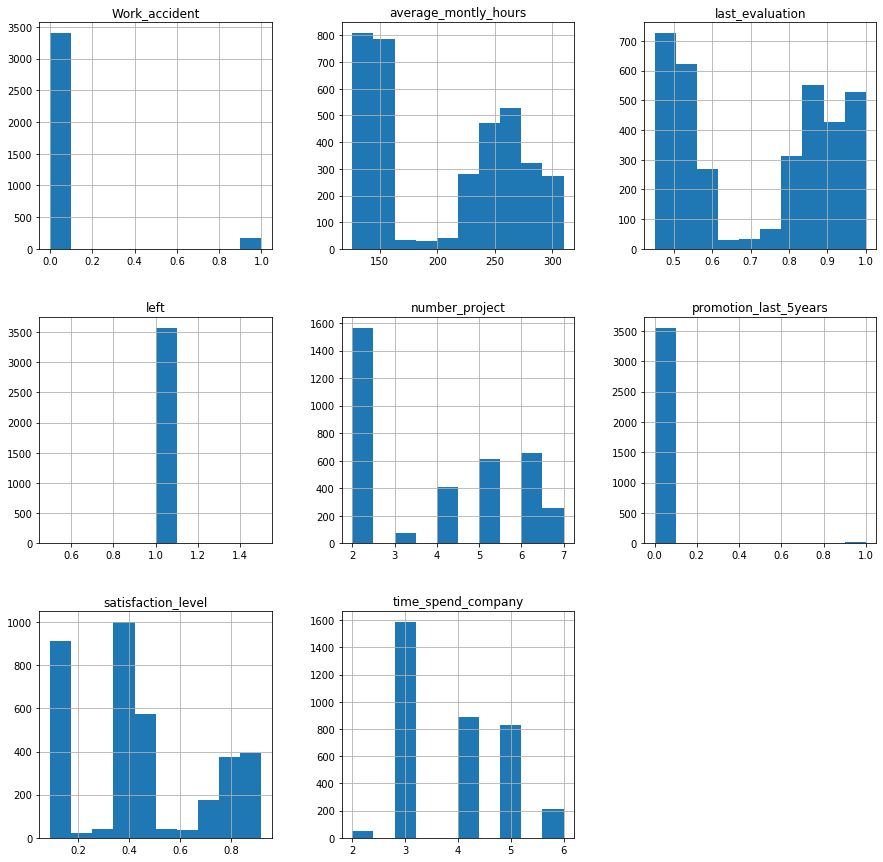

In [49]:
df_left.hist(figsize=(15,15))
plt.show()

In [ ]:
# По этим гистограммам возникает сразу несколько гипотез: 
# чаще всего уходят те люди, кто либо мало работает в месяц, либо много;
# почти все не прошли повышение за последние 5 лет;
# c низким уровнем удовлетворенности;

# после шести лет работы люди из компании не уходят, не смотря ни на что(?)

# Проведем регрессионный анализ (не линейный, поскольку зависимая переменная биномиальная):

In [7]:
data =df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','promotion_last_5years','left']]
  
input_x  = data.iloc[:, :-1]
output_y = data.iloc[:,-1]

In [8]:
split = int(0.7*len(data))

X_train, X_test, y_train, y_test = input_x[:split],input_x[split:], output_y[:split], output_y[split:]

In [9]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.415198
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10494
Method:                           MLE   Df Model:                            4
Date:                Sat, 30 May 2020   Pseudo R-squ.:                  0.1473
Time:                        17:09:19   Log-Likelihood:                -4359.2
converged:                       True   LL-Null:                       -5112.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -4.0620      0.109    -37.266      0.000      -4.276      -3.

In [12]:
#  Другой вариант
model = LogisticRegression()
model = model.fit (X_train,y_train)
pd.DataFrame(zip(input_x.columns, np.transpose(model.coef_)))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1
0,satisfaction_level,[-4.121419868781793]
1,last_evaluation,[0.7418312818723274]
2,number_project,[-0.22837017051501607]
3,average_montly_hours,[0.00426733687185153]
4,promotion_last_5years,[-0.6324083508093119]


In [ ]:
# Статистика примерно одинаковая, p-value по первому методу < 0.05 у всех атрибутов, что говорит, 
#  о том, что все атрибуты значимы

In [13]:
# Третий вариант
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=3000)

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2929
           1       0.95      1.00      0.98      1571

    accuracy                           0.98      4500
   macro avg       0.98      0.99      0.98      4500
weighted avg       0.98      0.98      0.98      4500



0.9828888888888889

No handles with labels found to put in legend.


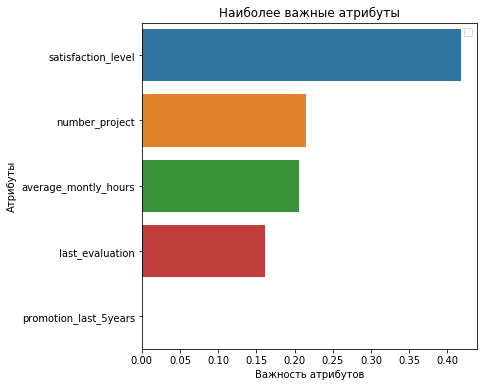

In [15]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [ ]:
# Рассмотрим подробнее некоторые корреляции

# 1. Влияние уровня удовлетворенности

In [3]:
sat_level_all = df['satisfaction_level']
sat_level_left = df[df['left'] == 1]['satisfaction_level']
print(stats.mannwhitneyu(sat_level_all, sat_level_left))

MannwhitneyuResult(statistic=16662493.5, pvalue=6.018748455764905e-271)


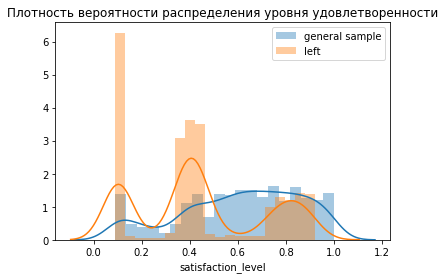

In [5]:
sns.distplot(sat_level_all, 20)
sns.distplot(sat_level_left, 20)
plt.title('Плотность вероятности распределения уровня удовлетворенности')
plt.legend(['general sample', 'left'])
plt.show()

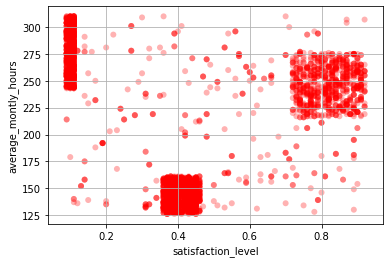

In [5]:
satisfaction_level = df_left['satisfaction_level']
average_montly_hours = df_left['average_montly_hours']
fig, ax = plt.subplots()
ax.scatter(satisfaction_level, average_montly_hours, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.show()

In [52]:
# Дополнительная проверка
df01 =  df[df['satisfaction_level'] <= 0.1]
print(len(df01))
len(df01[df01['left'] ==1]) # Все сотрудники с низким уровнем удовлетворенности уволились(вне зависимости от других факторов)

553


553

In [7]:
df07 =  df_left[df_left['satisfaction_level'] > 0.7]
df07['salary'].value_counts(normalize=True)  # Подгруппа с высоким уровнем удовлетворенности (> 0.7) и 
# относительно высоким уровнем занятости (> 200 и < 280) показала отличную от генеральной совокупности статистику по зарплатам:
# более высокий процент низкой зарплаты, что тоже , возможно, послужило причиной увольнения

low       0.603430
medium    0.380493
high      0.016077
Name: salary, dtype: float64

In [ ]:
# Чем недовольны были сотрудники с низким уровнем занятости (квадрат в центре) - требует дальнейшего анализа

In [ ]:
# 2.Корреляция с занятостью

In [53]:
work_hours_all = df['average_montly_hours']
work_hours_left = df_left['average_montly_hours']

print(stats.mannwhitneyu(work_hours_all, work_hours_left))

MannwhitneyuResult(statistic=25495808.0, pvalue=4.040777820038049e-06)


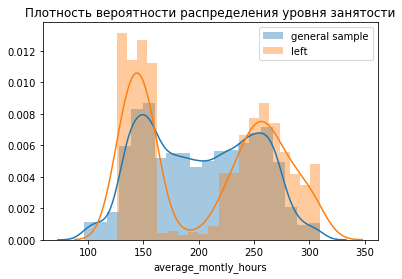

In [54]:
sns.distplot(work_hours_all, 20)
sns.distplot(work_hours_left, 20)
plt.title('Плотность вероятности распределения уровня занятости')
plt.legend(['general sample', 'left'])
plt.show()

In [ ]:
#  Увольняются сотрудники либо с низкой загруженость на работе, либо с высокой

MannwhitneyuResult(statistic=25495808.0, pvalue=4.040777820038049e-06)


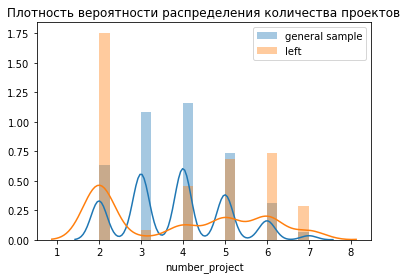

In [55]:
number_project_all = df['number_project']
number_project_left = df_left['number_project']

print(stats.mannwhitneyu(work_hours_all, work_hours_left))

sns.distplot(number_project_all, 20)
sns.distplot(number_project_left, 20)
plt.title('Плотность вероятности распределения количества проектов')
plt.legend(['general sample', 'left'])
plt.show()

In [42]:
# Проведем дополнительную проверку:
df_left['number_project'].value_counts() # На первый взгляд закономерности нет

2    1567
6     655
5     612
4     409
7     256
3      72
Name: number_project, dtype: int64

In [43]:
# Сравним с генеральной совокупностью
df['number_project'].value_counts() # Работавшие в семи проектах уволились все

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [ ]:
# 3. Корреляция с уровнем заработной платы

In [61]:
df['salary'].value_counts(normalize=True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

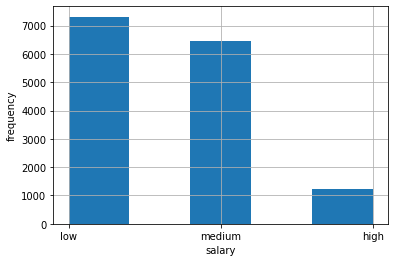

In [58]:
n, bins, patches = plt.hist(df['salary'], 5)
plt.ylabel('frequency')
plt.xlabel('salary')
plt.grid(True)
plt.show()

In [62]:
df_left['salary'].value_counts(normalize=True)

low       0.608233
medium    0.368804
high      0.022963
Name: salary, dtype: float64

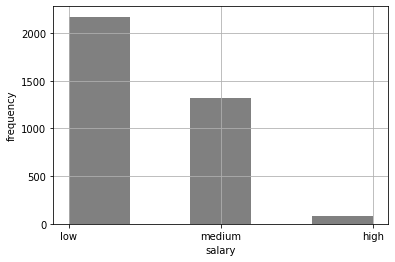

In [60]:
n, bins, patches = plt.hist(df_left['salary'], 5,facecolor='grey')
plt.ylabel('frequency')
plt.xlabel('salary')
plt.grid(True)
plt.show()

In [ ]:
# Уволившихся меньше с высоким и средним уровнем зарплаты и больше с низким.

In [ ]:
# Таким образом, причинами увольнения являются чрезмерная занятость
# и низкая удовлетворенность (хотя факторы однозначно зависимые). Остальные гипотезы тебуют дальнейшего изучения.